In [1]:
import pandas as pd
import numpy as np
import sklearn.metrics as sm
import sklearn
import matplotlib.pyplot as plt
import nltk

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.preprocessing import normalize
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

In [2]:
digits = load_digits()

# Show the dimensionality of the data
print("N samples x N feature:", digits.data.shape)

N samples x N feature: (1797, 64)


<Figure size 640x480 with 0 Axes>

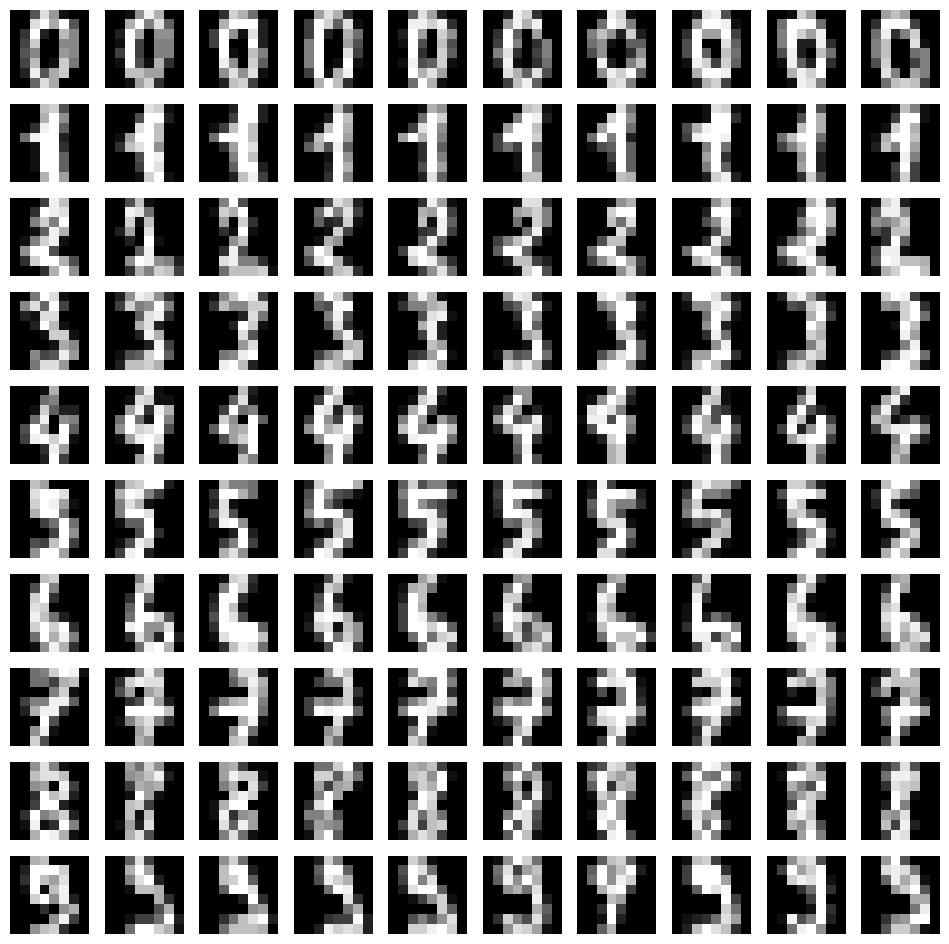

In [3]:
# Show several data for each label (== category) 

plt.gray() 

images = digits.images
Y = digits.target

unique_digits = np.unique(Y)
n_digits = len(unique_digits)

fig, axs = plt.subplots(n_digits, n_digits, figsize=(12, 12))
for i, target in enumerate(unique_digits):
    for j in range(n_digits):
        a = images[Y == target][j]
        axs[i,j].imshow(a)
        axs[i,j].axis('off')

In [5]:
# Compute some unsupervised score for the given model
def bench_k_means(estimator, data, y=None):
    estimator.fit(data)
    scores = [
        "adjusted_rand_score",
        "adjusted_mutual_info_score",
        "silhouette_score",
        "homogeneity_score",
        "completeness_score",
        "v_measure_score",
    ]

    results = []
    for s in scores:
        if s not in ["silhouette_score"]:
            # with ground-truth
            # Yeah !
            score = getattr(metrics, s)(y, estimator.labels_)
        elif y is not None:
            # with NO ground-truth
            score = getattr(metrics, s)(data, estimator.labels_)
        else:
            continue
            
        results.append(score)
        
    return pd.DataFrame([results], columns=scores, index=["result"])

In [6]:
# Try K-means

X = scale(digits.data)
y = digits.target

# Set K
K = n_digits

# Define model
model = KMeans(n_clusters=K, n_init=10)
# Test model
bench_k_means(model, X, y).round(2)

,adjusted_rand_score,adjusted_mutual_info_score,silhouette_score,homogeneity_score,completeness_score,v_measure_score
result,0.47,0.62,0.14,0.6,0.65,0.63


In [7]:
# PCA Transformation - Reduce dimension to a 2D features shape.
pca = PCA(2)
X2 = pca.fit_transform(X)

model = KMeans(n_clusters=K, n_init=10)
y_pred2 = model.fit_predict(X2)

# Try doing the same using pipeline ?

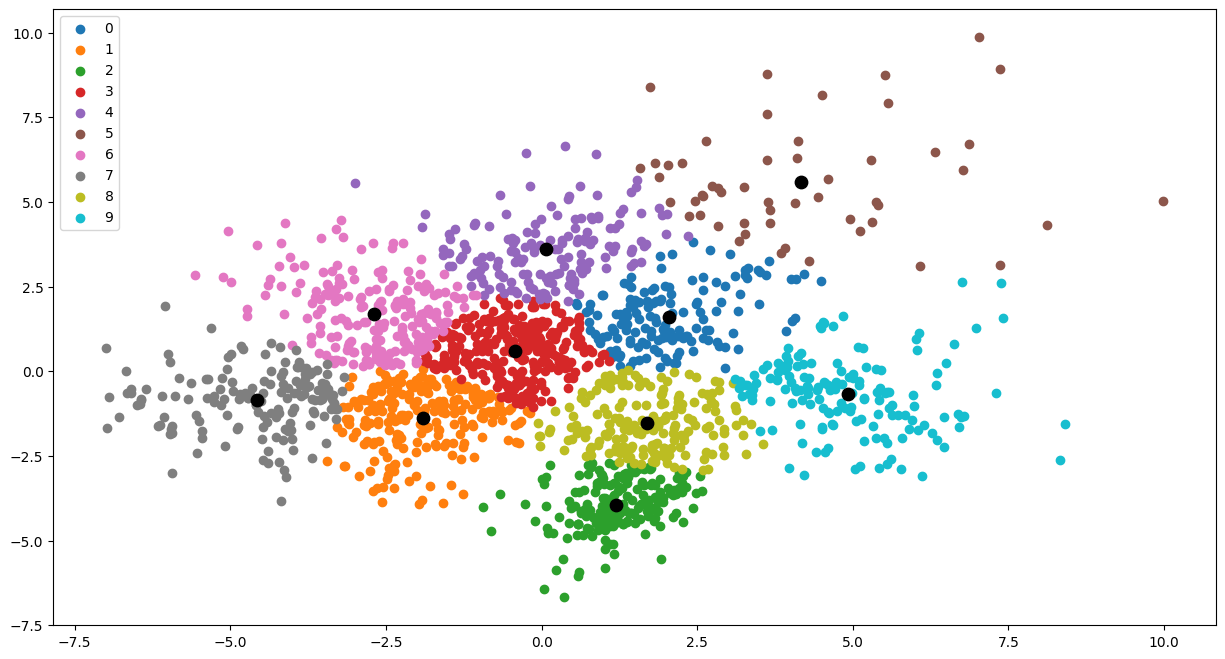

In [11]:
centroids = model.cluster_centers_
unique_labels = np.unique(y_pred2)
 
# Plot 2D result
fig = plt.figure(1, figsize=(15, 8))
for i in unique_labels:
    plt.scatter(X2[y_pred2 == i , 0] , X2[y_pred2 == i , 1] , label=i)
plt.scatter(centroids[:,0] , centroids[:,1] , s=80, color='k')
plt.legend()
plt.show()